# Simple Linear Regression on BCA standards curve

Usage:

0) (Optional) If the modules are not installed, please install via `pip` or `conda`.

1) In Excel, create a table with 4 columns labeled "Standard", "I1", "I2", "I3" where Standard column has the numerical value of concentration of standard (ng/uL) and I1, I2, I3 have the corresponding luminescence intensity values.

2) Go to Step 1. and replace the `file` variable with the correct path to your Excel file on your computer.

3) Then click "Kernel" > "Restart and Run all"

4) See the beautiful plot!

https://realpython.com/linear-regression-in-python/

# 0. Import the following modules

Download these with either `pip` or `anaconda`

`pip install numpy`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

# 1. Load the data from Excel

Replace the `file` variable with the path to the Excel file.

In [82]:
file = "BCA_Standard_Linear_Regression.xlsx"

In [83]:
# Load into a pandas dataframe
df = pd.read_excel(file)
df

,Standard,I1,I2,I3
0,0,0.317,0.305,0.300
1,125,0.347,0.336,0.324
2,250,0.371,0.359,0.353
3,500,0.466,0.443,0.440
4,750,0.519,0.498,0.506
5,1000,0.607,0.582,0.557
6,1500,0.761,0.720,0.698
7,2000,0.935,0.904,0.858


In [89]:
# Convert from wide to long format
df_melted = pd.melt(df, id_vars=['Standard'], value_vars=['I1', 'I2', 'I3'])
df_melted

,Standard,variable,value
0,0,I1,0.317
1,125,I1,0.347
2,250,I1,0.371
3,500,I1,0.466
4,750,I1,0.519
5,1000,I1,0.607
6,1500,I1,0.761
7,2000,I1,0.935
8,0,I2,0.305
9,125,I2,0.336


# 2. Run the `sklearn` 's `LinearRegression()` function.

In [100]:
model = LinearRegression()
standard = df_melted.Standard.to_numpy().reshape((-1, 1))
value = df_melted.value
model.fit(standard, value)

LinearRegression()

# 3. Outputs:

In [102]:
print('intercept:', model.intercept_)

intercept: 0.2957651386530843


In [103]:
print('slope:', model.coef_)

slope: [0.00029429]


In [105]:
y_pred = model.predict(standard)
# Alternatively
# y_pred = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred, sep='\n')

predicted response:
[0.29576514 0.33255178 0.36933843 0.44291171 0.516485   0.59005829
 0.73720487 0.88435144 0.29576514 0.33255178 0.36933843 0.44291171
 0.516485   0.59005829 0.73720487 0.88435144 0.29576514 0.33255178
 0.36933843 0.44291171 0.516485   0.59005829 0.73720487 0.88435144]


In [106]:
print("Equation: y = {0} + {1} * x".format(model.intercept_, model.coef_))

Equation: y = 0.2957651386530843 + [0.00029429] * x


In [101]:
r_sq = model.score(standard, value)
print('coefficient of determination (R^2):', r_sq)

coefficient of determination R^2: 0.9892832905430707


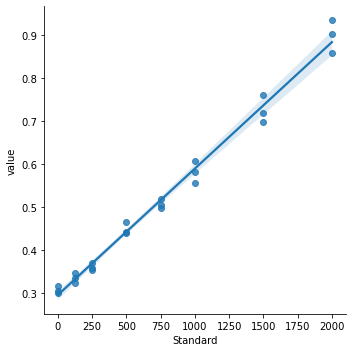

In [92]:
sns.lmplot(x="Standard", y="value", data=df_melted, fit_reg=True, ci=95, n_boot=1000)